#Twitter sentiment analysis
This notebook details the steps taken to build a deep learning model to predict text sentiment. The model is trained on a Twitter sentiment dataset.


Code adapted from https://www.kaggle.com/arunrk7/nlp-beginner-text-classification-using-lstm

## Loading in the data

In [ ]:
!python --version

Python 3.6.9


Imports:


*   Tensorflow - used to build and train the deep learning model
*   NLTK - used for text preprocessing



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

print("Tensorflow Version",tf.__version__)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.3.0


In [2]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Running on TPU  ['10.104.82.42:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.104.82.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.104.82.42:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
from google.colab import drive
# mount into google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json api is present in the Google Drive

In [6]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
# downloading our twitter sentiment dataset
!kaggle datasets download -d kazanova/sentiment140

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

The dataset contains columns for an ID, date/time a tweet was made, a query, the handle of the user who made the tweet, and the tweet itself.

In [7]:
# read in our dataset
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='Latin', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
# set column names
df.columns = ['sentiment', 'id', 'date', 'query', 'username', 'tweet']
df.head()

,sentiment,id,date,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


We're only interested in the tweets themselves and their sentiment. The sentiment column has 2 unique values; 0 (representing negative sentiment) and 4 (representing positive sentiment). I will change these to labels for ease of understanding. We can remove the other columns, but we'll keep the date/time for some exploratory data analysis and visualizations. 

In [9]:
# don't need some columns so remove them
df = df.drop(['id','query','username'], axis=1)
# map sentiment values to a string
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,date,tweet
0,Negative,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,Negative,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,Negative,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,Negative,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


Let's look at the distribution of negative and positive labelled tweets. Ideally we'd want a 50/50 split, but we do have a lot of data at our disposal (1.6 million tweets)

Text(0.5, 1.0, 'Sentiment Data Distribution')

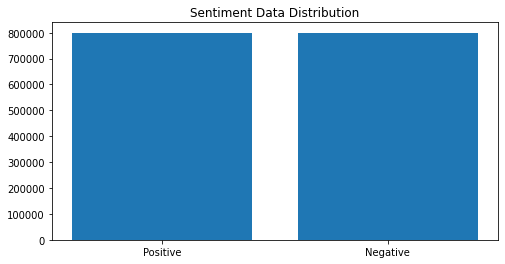

In [ ]:
val_count = df.sentiment.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

As it happens we have pretty much an even split :)

### Data cleaning/preprocesing
There is text in the tweets which doesn't contribute to the sentiment, so we'll remove this to clean our data. We'll be removing symbols, links, tags (@s) and [stopwords](https://gist.github.com/sebleier/554280). We'll also be [stemming](https://en.wikipedia.org/wiki/Stemming) the words. 

In [10]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

df.tweet = df.tweet.apply(lambda x: preprocess(x))
df.head()

,sentiment,date,tweet
0,Negative,Mon Apr 06 22:19:45 PDT 2009,awww bummer shoulda got david carr third day
1,Negative,Mon Apr 06 22:19:49 PDT 2009,upset update facebook texting might cry result...
2,Negative,Mon Apr 06 22:19:53 PDT 2009,dived many times ball managed save 50 rest go ...
3,Negative,Mon Apr 06 22:19:57 PDT 2009,whole body feels itchy like fire
4,Negative,Mon Apr 06 22:19:57 PDT 2009,behaving mad see


##EDA and data visualizations
Although we won't be doing any feature engineering in building this model, it is still interesting to explore our data to potentially extract some insights

### Word clouds
We'll look at the most common words amongst positive and negative tweets.

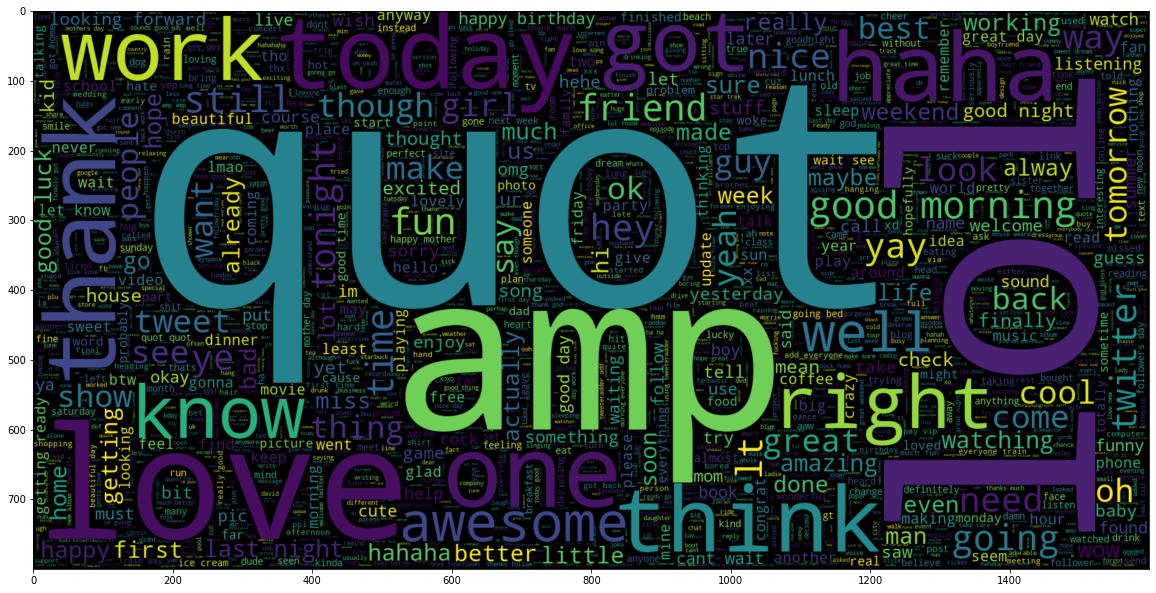

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].tweet))
plt.imshow(wc , interpolation = 'bilinear')

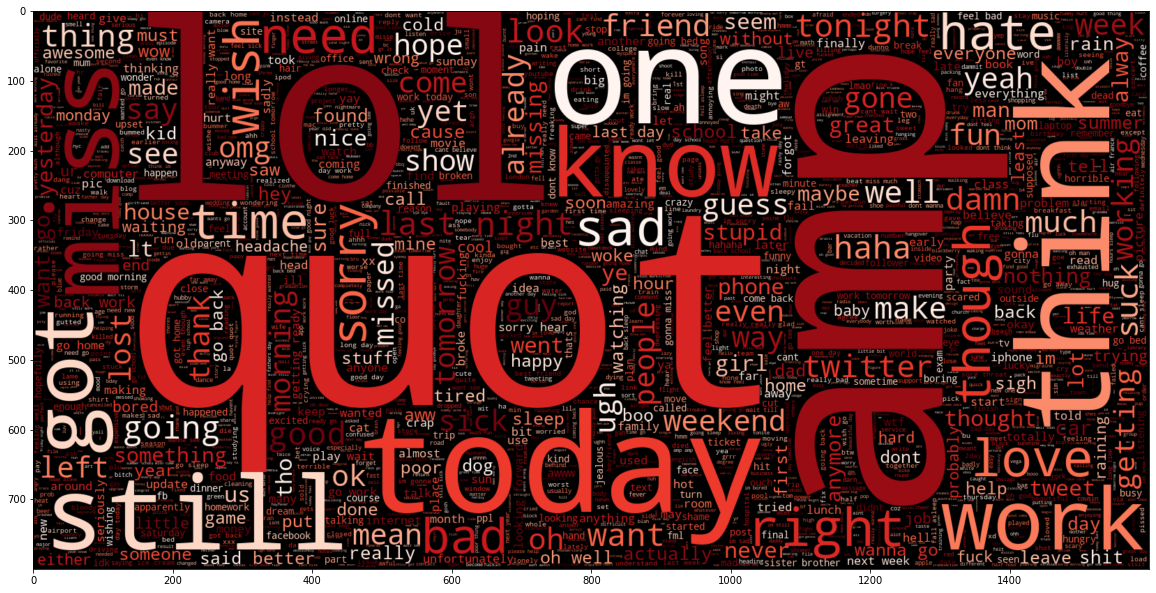

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, colormap='Reds').generate(" ".join(df[df.sentiment == 'Negative'].tweet))
plt.imshow(wc , interpolation = 'bilinear')

As we can see, some of the most popular words in the word clouds are common to both. We should consider this when building our model.

### Number of tweets per day of the week and hour of the day
I'm interested in seeing if certain days of the week and hours of the day have more tweets than others, which may indicate greater usage of Twitter on these days and in these hours.

Text(0.5, 1.0, 'Tweets per day of week distribution')

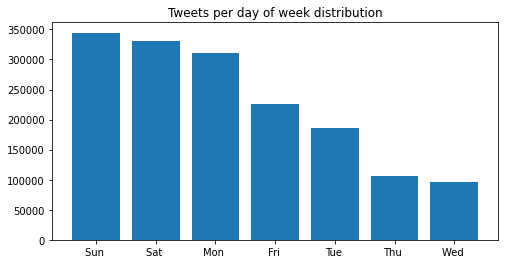

In [ ]:
df['day'] = df.date.apply(lambda x: x[:4])
val_count = df.day.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Tweets per day of week distribution")

Looks like the weekends and Mondays had a lot of tweets made on them, and the midweek not so much.

Text(0.5, 1.0, 'Tweets per hour of day distribution')

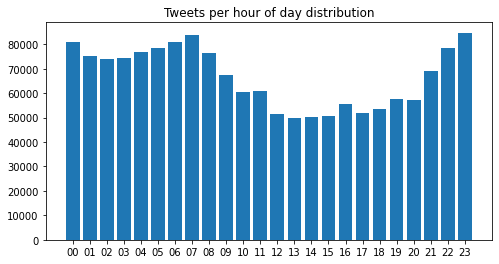

In [ ]:
df['hour'] = df.date.apply(lambda x: x[11:13])
val_count = df.hour.value_counts().sort_index()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Tweets per hour of day distribution")

Most tweets were being made in the early mornings before declining at 8 AM, before picking up again at 4/5 PM. A pattern as I was generally expecting, as it follows the work day schedule.

## Training and testing model


In [11]:
# take 80% of data as our training set
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
# allow for a maximum sequence length (tweet word count after processing) of 30
MAX_SEQUENCE_LENGTH = 30

In [12]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7)

print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [ ]:
train_data.head(10)

,sentiment,date,tweet,day,month,hour
23786,Negative,Sun Apr 19 06:07:16 PDT 2009,need friends,Sun,Apr,06
182699,Negative,Fri May 29 19:12:32 PDT 2009,im trying call impossible,Fri,May,19
476661,Negative,Mon Jun 15 06:57:29 PDT 2009,good pace going 3k 13 min missed 5k turn ended...,Mon,Jun,06
1181490,Positive,Sun May 31 10:31:26 PDT 2009,u gonna shows ny soon luv see u live,Sun,May,10
878773,Positive,Sat May 02 23:50:16 PDT 2009,hell yea get em tattoos ink free wish parents ...,Sat,May,23
130866,Negative,Mon May 18 05:54:07 PDT 2009,yeah need 2 see ur mom calls back first rememb...,Mon,May,05
1235876,Positive,Mon Jun 01 09:09:47 PDT 2009,sounds like cup tea sign,Mon,Jun,09
717314,Negative,Sat Jun 20 18:26:50 PDT 2009,tired want sleep wtf,Sat,Jun,18
969880,Positive,Sun May 17 11:51:37 PDT 2009,amazing wish,Sun,May,11
748698,Negative,Mon Jun 22 14:00:12 PDT 2009,thank god wkrn abc affiliate nashville back mi...,Mon,Jun,14


Tokenize our text (map each word to an index)

In [13]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


We need to ensure each sequence fed into the model is the same length, so we 'pad' them.

In [14]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


Encode our sentiment labels (give them some numerical value)

In [15]:
labels = train_data.sentiment.unique().tolist()

In [16]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())
# we want just need one column holding sentiment values
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


## Word embedding
[Word embedding](https://en.wikipedia.org/wiki/Word_embedding) is the process of mapping words and phrases to vectors of real numbers. We'll be using [GloVe Embedding from Stanford AI](https://nlp.stanford.edu/projects/glove/).

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [24]:
# we'll use 50-dimensional embedding to keep our model small
# not much less accuracy compared to 300-dimensional in this model
GLOVE_EMB = 'glove.6B.50d.txt'
EMBEDDING_DIM = 50
LR = 1e-3
# split our training data into batches of size 1024
BATCH_SIZE = 1024
# train on our data 10 times over
EPOCHS = 10

We can see how many words are in the vocabulary of this embedding.

In [25]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [26]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [27]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

### Model Training - LSTM
As seen in the word cloud, some of the most often appearing words are common to both positive and negative tweets. This may be a problem if we use models such as Naive Bayes and SVD. So we will use *sequence modelling*, to predict words successively in our sequence. 

In [28]:
from tensorflow.keras.layers import SpatialDropout1D, Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [29]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
# add dropouts (randomly set input units to 0) to prevent overfitting
x = SpatialDropout1D(0.2)(embedding_sequences)
# convolve data into data into smaller feature vectors
x = Conv1D(64, 5, activation='relu')(x)
# bidirectional LSTM runs forward and backward pass on inputs
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

I'll use the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) algorithm for optimizing [gradient descent](https://www.jeremyjordan.me/gradient-descent/). I'll also adjust the [learning rate](https://www.jeremyjordan.me/nn-learning-rate/) after each epoch.

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [31]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
   2/1250 [..............................] - ETA: 1:11 - loss: 0.6939 - accuracy: 0.4946WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0010s vs `on_train_batch_end` time: 0.1097s). Check your callbacks.


1250/1250 [==============================] - ETA: 0s - loss: 0.5807 - accuracy: 0.6889WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0008s vs `on_test_batch_end` time: 0.0305s). Check your callbacks.


1250/1250 [==============================] - 127s 102ms/step - loss: 0.5807 - accuracy: 0.6889 - val_loss: 0.5325 - val_accuracy: 0.7299
Epoch 2/10
1250/1250 [==============================] - 126s 101ms/step - loss: 0.5459 - accuracy: 0.7188 - val_loss: 0.5147 - val_accuracy: 0.7425
Epoch 3/10
1250/1250 [==============================] - 126s 101ms/step - loss: 0.5324 - accuracy: 0.7294 - val_loss: 0.5039 - val_accuracy: 0.7501
Epoch 4/10
1250/1250 [==============================] - 127s 102ms/step - loss: 0.5244 - accuracy: 0.7351 - val_loss: 0.4970 - val_accuracy: 0.7547
Epoch 5/10
1250/1250 [==============================] - 127s 102ms/step - loss: 0.5183 - accuracy: 0.7398 - val_loss: 0.4933 - val_accuracy: 0.7564
Epoch 6/10
1250/1250 [==============================] - 127s 101ms/step - loss: 0.5139 - accuracy: 0.7430 - val_loss: 0.4906 - val_accuracy: 0.7585
Epoch 7/10
1250/1250 [==============================] - 127s 101ms/step - loss: 0.5106 - accuracy: 0.7451 - val_loss: 0.486

### Model Evaluation

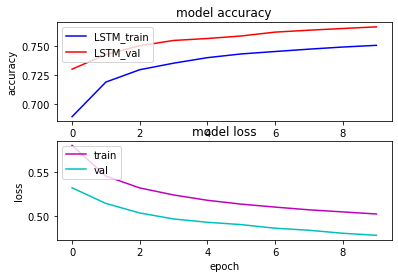

In [33]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [34]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

 2/32 [>.............................] - ETA: 5sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0008s vs `on_predict_batch_end` time: 0.2622s). Check your callbacks.


32/32 [==============================] - 8s 255ms/step


In [35]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


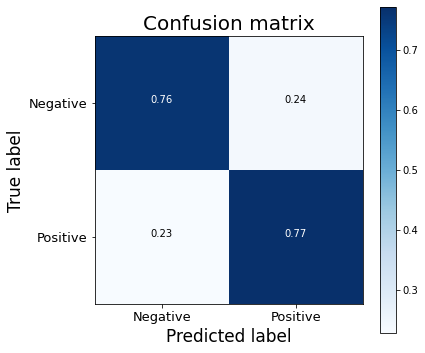

In [36]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [37]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.77      0.76      0.77    160542
    Positive       0.76      0.77      0.77    159458

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [32]:
tf.keras.models.save_model(model, 'my_models/twitter/model_50d.h5')

In [ ]:
import json
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))